## Spring Pendulum system

We will think of the **position** of the mass as a vector $q\in\mathbb{R}^2$, with its associated **momentum** $p\in\mathbb{R}^2$. The system's total energy (Hamiltonian) function is the sum of kinetic and potential energies:

$$ H(q,p) = \| p \|^2/2 + V_\text{spring}(\vec{0},q) + V_\text{gravity}(q)$$

Where $\|p\|$ is the familiar Euclidean norm, and the potential energy is made up of two terms: the spring connecting it to the origin and gravity pulling it down. We will use the following forms for these potential terms:

$$V_\text{spring}(u,v) :=k_0( \|u-v\|-r_0)^2/2$$
$$V_\text{gravity}(q) := g q_y$$

In [1]:
# Import libraries
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4.5) # adjusts plot dimension parameters
plt.rcParams["font.family"] = 'sans-serif'
plt.rcParams["font.sans-serif"] = ['Tahoma'] # changes font

In [2]:
def Get_Energy(q,p):
    
    # Kinetic energy is easy
    ke = np.linalg.norm(p)**2 / 2
    
    # Set constants
    g = 1.0 
    k0 = 1.0 
    r0 = 1.0 
    
    # As gravity only acts in the vertical direction, we define q's vertical component
    q_y = q[1] 
    
    V_spring  = k0* (np.linalg.norm(0 - q) - r0 )**2 /2
    V_gravity = g*q_y
    
    # Total PE is the sum of the terms
    pe = V_spring + V_gravity
    
    
    H = ke + pe 
    
    return H 

Hamilton's equations of motion are

$$\dot{q} = \nabla_p H(q,p)$$
$$\dot{p} = -\nabla_q H(q,p)$$

The term $-\nabla_q H$ is often known as the **force**. 

To approximate a solution we'll need a routine that evaluates the right hand side (rhs) of this ODE. We define this function below:

In [3]:
def ode_rhs(q,p):
    
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    g = 1.0 
    k = 1.0 
    r0 = 1.0 
    
    dq_dt[0] = p[0]
    dq_dt[1] = p[1]
    
    x = q[0]
    y = q[1]
    r = np.linalg.norm( q )
    
    dp_dt[0] = -k * (r-r0) * x/r
    dp_dt[1] = -k * (r-r0) * y/r - g 
    
    return dq_dt, dp_dt 

In [4]:
def ode_rhs_2(q,p,k=1.0, r0=1.0):
    
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    g = 1.0  
    
    dq_dt[0] = p[0]
    dq_dt[1] = p[1]
    
    x = q[0]
    y = q[1]
    r = np.linalg.norm( q )
    
    dp_dt[0] = -k * (r-r0) * x/r
    dp_dt[1] = -k * (r-r0) * y/r - g 
    
    return dq_dt, dp_dt 

def Get_Energy_2(q,p,k0=1,r0=1.0):
    
    # Kinetic energy is easy
    ke = np.linalg.norm(p)**2 / 2
    
    # Set constants
    g = 1.0   
    
    # As gravity only acts in the vertical direction, we define q's vertical component
    q_y = q[1] 
    
    V_spring  = k0* (np.linalg.norm(0 - q) - r0 )**2 /2
    V_gravity = g*q_y
    
    # Total PE is the sum of the terms
    pe = V_spring + V_gravity
    
    
    H = ke + pe 
    
    return H 

# Verlet method

In [5]:
# Verlet method
def Verlet(q,p,t,h):
    
     # Compute the force
    dq_dt1, dp_dt1 = ode_rhs(q,p)
    
    # Do the update 
    pt_1 = p + h/2 * dp_dt1
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt, dp_dt = ode_rhs(qt, pt_1)
    pt = pt_1 + h/2 * dp_dt
    tt = t + h

    
    return qt, pt, tt 


In [6]:
# Set end time T and stepsize h  
T = 100
h = 0.005
Nsteps = int(T / h)

initial_q = np.array([-2.9/5,-4.1/5])
initial_p = np.array([0.1,0.2])
initial_t = 0

initial_ode_rhs = ode_rhs(initial_q,initial_p)

# Make a copy of our initial values so we
# don't accidently overwrite them 
q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

# Initialize our saved trajectory to be blank 
q_traj = [] 
p_traj = [] 
t_traj = [] 
e_traj3 = [] 

# Run the loop 
for n in range(Nsteps):
    q,p,t = Verlet(q,p,t,h)  # Update step
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e_traj3 = e_traj3 + [Get_Energy(q,p)]  
    
# Make these into numpy arrays
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

In [7]:
# Verlet method
def Verlet2(q,p,t,h,k=1.0,r0=1.0):
    
     # Compute the force
    dq_dt1, dp_dt1 = ode_rhs_2(q,p,k,r0)
    
    # Do the update 
    pt_1 = p + h/2 * dp_dt1
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt, dp_dt = ode_rhs_2(qt, pt_1,k,r0)
    pt = pt_1 + h/2 * dp_dt
    tt = t + h

    
    return qt, pt, tt 

In [8]:
def RunVerlet(myk0,myr0,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr0,0] )
    p = np.array( [0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = Verlet2(q,p,t,h,myk0,myr0)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_2(q,p,myk0,myr0 )]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

In [9]:
H = np.logspace(-2.5,-1.5,10)
T = 10.0 

res_h3 = []
for hh in H:
    res_h3 += [RunVerlet( 1.0 , 1.0 , hh , T )]
    


# Simplified Takahashi-Imada Method

In [10]:
# Simplified Takahashi-Imada
def S_T_I(q,p,t,h):
    
     # Compute the force
    alpha = 1
    dq_dt1, dp_dt1 = ode_rhs(q,p)
    dq_dt2, dp_dt2 = ode_rhs(q+alpha*h**2*dp_dt1, p)
    
    # Do the update 
    pt_1 = p + h/2 * dp_dt2
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt3, dp_dt3 = ode_rhs(qt,pt_1)
    dq_dt4, dp_dt4 = ode_rhs(qt + alpha*h**2*dp_dt3,pt_1)
    pt = pt_1 + h/2 * dp_dt4
    tt = t + h
    
    # Return values 
    
    return qt, pt, tt 

In [11]:
# Set end time T and stepsize h  
T = 100
h = 0.005
Nsteps = int(T / h)

initial_q = np.array([-2.9/5,-4.1/5])
initial_p = np.array([0.1,0.2])
initial_t = 0

initial_ode_rhs = ode_rhs(initial_q,initial_p)

# Make a copy of our initial values so we
# don't accidently overwrite them 
q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

# Initialize our saved trajectory to be blank 
q_traj = [] 
p_traj = [] 
t_traj = [] 
e_traj4 = [] 

# Run the loop 
for n in range(Nsteps):
    q,p,t = S_T_I(q,p,t,h)  # Update step
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e_traj4 = e_traj4 + [Get_Energy(q,p)]  
    
# Make these into numpy arrays
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

In [12]:
def S_T_I2(q,p,t,h,k=1.0,r0=1.0):
    
     # Compute the force
    alpha = 1
    dq_dt1, dp_dt1 = ode_rhs_2(q,p,k,r0)
    dq_dt2, dp_dt2 = ode_rhs_2(q+alpha*h**2*dp_dt1, p,k,r0)
    
    # Do the update 
    pt_1 = p + h/2 * dp_dt2
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt3, dp_dt3 = ode_rhs_2(qt,pt_1,k,r0)
    dq_dt4, dp_dt4 = ode_rhs_2(qt + alpha*h**2*dp_dt3,pt_1,k,r0)
    pt = pt_1 + h/2 * dp_dt4
    tt = t + h
    
    # Return values 
    
    return qt, pt, tt 

In [13]:
def RunSTI(myk0,myr0,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr0,0] )
    p = np.array( [0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = S_T_I2(q,p,t,h,myk0,myr0)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_2(q,p,myk0,myr0 )]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

In [14]:
H = np.logspace(-2.5,-1.5,10)
T = 10

res_h4 = []
for hh in H:
    res_h4 += [RunSTI( 1.0 , 1.0 , hh , T )]
    


# Takahashi-Imada Method

In [15]:
def ode_rhs_second(q,p):
    
    # Initialize the output 
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    
    # Set the constants 
    g = 1.0 
    k = 1.0 
    r0 = 1.0 
    
    # dq/dt = p, according to Hamilton's eqns
    
    x = q[0]
    y = q[1]
    r = np.linalg.norm( q )
    
    #H11 = -k*(r-r0)/r-k*x**2/(r**2)
    #H12 = -k*x*y/r**2
    #H22 = -k*(r-r0)/r-k*y**2/(r**2)
    H11=k * x**2 / (r**2) + k * (r-r0) * x**2 / (r**3) + k * (r-r0) / r
    H12 = k * x * y / (r**2) - k * x * y * (r-r0) / (r**3)
    H22 = k * y**2 / (r**2) + k * (r-r0) * y**2 / (r**3) + k * (r-r0) / r
    Hess = np.zeros([2,2])
    Hess[0,0]=H11
    Hess[0,1]=H12
    Hess[1,0]=H12
    Hess[1,1]=H22
    
    return Hess

    dp_dt[0] = -k * (r-r0) * x/r
    dp_dt[1] = -k * (r-r0) * y/r - g

In [16]:
# Takahashi-Imada
def T_I(q,p,t,h):
    
     # Compute the force
    alpha = 1
    dq_dt1, dp_dt1 = ode_rhs(q,p)
    H1 = ode_rhs_second(q, p)
    
    # Do the update 
    pt_1 = p + h/2 * (dp_dt1+alpha*h**2*np.dot(H1,dp_dt1))
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt3, dp_dt3 = ode_rhs(qt,p)
    H2 = ode_rhs_second(qt, p)
    # dq_dt4, dp_dt4 = ode_rhs(qt + alpha*h**2*dp_dt3,pt_1)
    pt = pt_1 + h/2 * (dp_dt3+alpha*h**2*np.dot(H2,dp_dt3))
    tt = t + h
    
    return qt, pt, tt 

In [17]:
# Set end time T and stepsize h  
T = 100
h = 0.005
Nsteps = int(T / h)

initial_q = np.array([-2.9/5,-4.1/5])
initial_p = np.array([0.1,0.2])
initial_t = 0

initial_ode_rhs = ode_rhs(initial_q,initial_p)

# Make a copy of our initial values so we
# don't accidently overwrite them 
q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

# Initialize our saved trajectory to be blank 
q_traj = [] 
p_traj = [] 
t_traj = [] 
e_traj5 = [] 

# Run the loop 
for n in range(Nsteps):
    q,p,t = T_I(q,p,t,h)  # Update step
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e_traj5 = e_traj5 + [Get_Energy(q,p)] 
    
# Make these into numpy arrays
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 


In [18]:
def T_I2(q,p,t,h,k=1.0,r0=1.0):
    
     
     # Compute the force
    alpha = 1
    dq_dt1, dp_dt1 = ode_rhs_2(q,p,k,r0)
    H1 = ode_rhs_second2(q, p,k,r0)
    
    # Do the update 
    pt_1 = p + h/2 * (dp_dt1+alpha*h**2*np.dot(H1,dp_dt1))
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt3, dp_dt3 = ode_rhs_2(qt,p,k,r0)
    H2 = ode_rhs_second2(qt, p,k,r0)
    # dq_dt4, dp_dt4 = ode_rhs(qt + alpha*h**2*dp_dt3,pt_1)
    pt = pt_1 + h/2 * (dp_dt3+alpha*h**2*np.dot(H2,dp_dt3))
    tt = t + h
    
    return qt, pt, tt 

In [19]:
def ode_rhs_second2(q,p,k,r0):
    
    # Initialize the output 
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    
    # Set the constants 
    g = 1.0  
    
    # dq/dt = p, according to Hamilton's eqns
    dq_dt[0] = p[0]
    dq_dt[1] = p[1]
    
    x = q[0]
    y = q[1]
    r = np.linalg.norm( q )
    
    Hess = np.zeros([2,2])
    H11=k * x**2 / (r**2) + k * (r-r0) * x**2 / (r**3) + k * (r-r0) / r
    H12 = k * x * y / (r**2) - k * x * y * (r-r0) / (r**3)
    H22 = k * y**2 / (r**2) + k * (r-r0) * y**2 / (r**3) + k * (r-r0) / r
    
    Hess[0,0]=H11
    Hess[0,1]=H12
    Hess[1,0]=H12
    Hess[1,1]=H22
    
    return Hess

In [20]:
def RunTI(myk0,myr0,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr0,0] )
    p = np.array( [0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = T_I2(q,p,t,h,myk0,myr0)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_2(q,p,myk0,myr0 )]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

In [21]:
H = np.logspace(-2.5,-1.5,10)
T = 10

res_h5 = []
for hh in H:
    res_h5 += [RunTI( 1.0 , 1.0 , hh , T )]



# Yoshida Method

In [22]:
def yoshida(q,p,t,h):
    tau0 = 1.3512
    tau1 = -1.7024
    qt_1, pt_1, t1 = Verlet(q, p, t, h*tau0)
    qt_2, pt_2, t2 = Verlet(qt_1, pt_1, t, h*tau1)
    qt_3, pt_3, t2 = Verlet(qt_2, pt_2, t, h*tau0)
    tt = t + h
    return qt_3, pt_3, tt

In [23]:
# Set end time T and stepsize h  
T = 100
h = 0.005
Nsteps = int(T / h)

initial_q = np.array([-2.9/5,-4.1/5])
initial_p = np.array([0.1,0.2])
initial_t = 0

initial_ode_rhs = ode_rhs(initial_q,initial_p)

# Make a copy of our initial values so we
# don't accidently overwrite them 
q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

# Initialize our saved trajectory to be blank 
q_traj = [] 
p_traj = [] 
t_traj = [] 
e_traj6 = [] 

# Run the loop 
for n in range(Nsteps):
    q,p,t = yoshida(q,p,t,h)  # Update step
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e_traj6 = e_traj6 + [Get_Energy(q,p)] 
    
# Make these into numpy arrays
q_traj = np.array(q_traj)
p_traj = np.array(p_traj)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


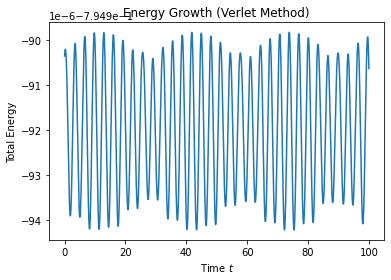

In [24]:
plt.plot(t_traj, e_traj3, label = 'Verlet',color = "tab:blue")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Verlet Method)')
plt.savefig('EG-4a.png')
plt.show()

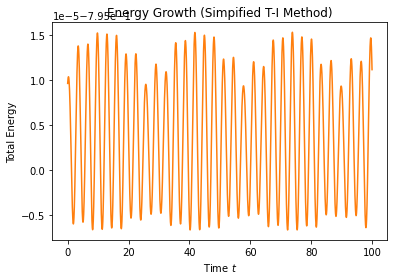

In [25]:
plt.plot(t_traj, e_traj4, label = 'S-T-I',color = "tab:orange")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Simpified T-I Method)')
plt.savefig('EG-4b.png')
plt.show()

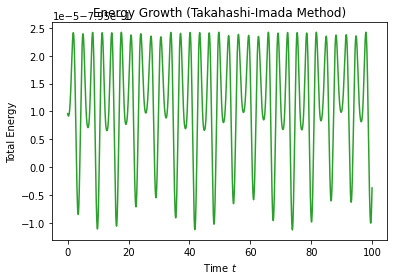

In [26]:
plt.plot(t_traj, e_traj5, label = 'T-I', color = "tab:green")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Takahashi-Imada Method)')
plt.savefig('EG-4c.png')
plt.show()

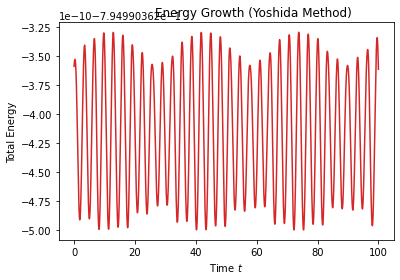

In [27]:
plt.plot(t_traj, e_traj6, label = 'Yoshida',color = "tab:red")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Yoshida Method)', x = 0.58)
plt.savefig('EG-4d.png')
plt.show()

In [28]:
def yoshida_2(q,p,t,h,k=1.0,r0=1.0):
    tau0 = 1.3512
    tau1 = -1.7024
    qt_1, pt_1, t1 = Verlet2(q, p, t, h*tau0,k,r0)
    qt_2, pt_2, t2 = Verlet2(qt_1, pt_1, t, h*tau1,k,r0)
    qt_3, pt_3, t2 = Verlet2(qt_2, pt_2, t, h*tau0,k,r0)
    tt = t + h
    return qt_3, pt_3, tt

In [29]:
def RunYoshida(myk0,myr0,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr0,0] )
    p = np.array( [0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = yoshida_2(q,p,t,h,myk0,myr0)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_2(q,p,myk0,myr0 )]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

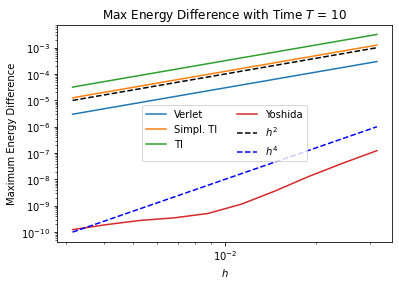

In [30]:
H = np.logspace(-2.5,-1.5,10)
T = 10 

res_h6 = []
for hh in H:
    res_h6 += [RunYoshida( 1.0 , 1.0 , hh , T )]

plt.loglog( H , res_h3 ,label='Verlet')
plt.loglog( H , res_h4 ,label='Simpl. TI')
plt.loglog( H , res_h5 ,label='TI')
plt.loglog( H , res_h6 ,label='Yoshida')
plt.loglog( H , H**2,'--k' ,label='$h^2$')
plt.loglog( H , H**4,'--b' , label = '$h^4$')
plt.xlabel('$h$')
plt.ylabel('Maximum Energy Difference')
plt.title('Max Energy Difference with Time $T$ = 10')
plt.legend(ncol = 2)
plt.savefig('pendulum_all.png')
plt.show()

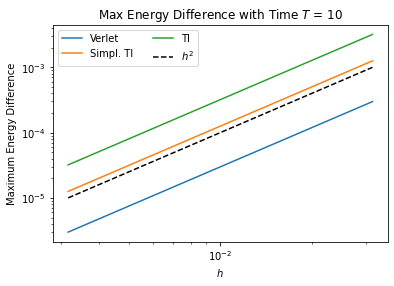

In [31]:
plt.loglog( H , res_h3 ,label='Verlet')
plt.loglog( H , res_h4 ,label='Simpl. TI')
plt.loglog( H , res_h5 ,label='TI')
plt.loglog( H , H**2,'--k' ,label='$h^2$')
plt.xlabel('$h$')
plt.ylabel('Maximum Energy Difference')
plt.title('Max Energy Difference with Time $T$ = 10')
plt.legend(ncol = 2)
plt.savefig('pendulum_order2.png')
plt.show()

## Double pendulum

$$ H(q,p) = \| p_1 \|^2/2 + \| p_2 \|^2/2 + V_\text{spring_1}(0,q_1)+ V_\text{spring_2}(q_1,q_2) + V_\text{gravity}(q_1)+ V_\text{gravity}(q_2)$$

where 

$$V_\text{spring_1}(u,v) :=k_1( \|u-v\|-r_1)^2/2$$
$$V_\text{spring_2}(u,v) :=k_2( \|u-v\|-r_2)^2/2$$
$$V_\text{gravity}(q) := g q_y$$



In [32]:
def Get_Energy(q,p): 
    
    g = 1.0 
    k1 = 1.0 
    k2 = 1.0 
    r1 = 1.0 
    r2 = 1.0  
    
    # Your code here
    p1 = np.array([p[0],p[1]])                    
    p2 = np.array([p[2],p[3]])
    q1 = np.array([q[0],q[1]])
    q2 = np.array([q[2],q[3]])
    ke_1 = np.linalg.norm(p1)**2 / 2    # the norm of p1
    ke_2 = np.linalg.norm(p2)**2 / 2    # the norm of p2
    
    q1_y = q[1]
    q2_y = q[3]
    
    V1_spring = k1*(np.linalg.norm(0 - q1) - r1)**2 /2
    V2_spring = k2*(np.linalg.norm(q1 - q2) - r2)**2 /2
    V1_gravity = g*q1_y
    V2_gravity = g*q2_y
    
    H = ke_1 + ke_2 + V1_spring + V2_spring + V1_gravity +V2_gravity
    
    return H 

In [33]:
def ode_rhs(q,p):
    
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    g = 1.0 
    k1 = 1.0 
    k2 = 1.0 
    r1 = 1.0 
    r2 = 1.0  
    
    # Your code here 
    p1 = np.array([p[0],p[1]])                    
    p2 = np.array([p[2],p[3]])
    q1 = np.array([q[0],q[1]])
    q2 = np.array([q[2],q[3]])
    
    dq_dt[0] = p1[0] 
    dq_dt[1] = p1[1] 
    dq_dt[2] = p2[0]
    dq_dt[3] = p2[1]
    
    x1 = q1[0]
    y1 = q1[1]
    x2 = q2[0]
    y2 = q2[1]
    r_q1 = np.linalg.norm(q1)
    r_q2 = np.linalg.norm(q2)
    
    r_q12 = np.linalg.norm(q1 - q2)
    
    dp_dt[0] = -k1 *(1 - r1/r_q12)* (x1 -x2) + k1 * (1 - r1/r_q1)* (0 - x1)   
    dp_dt[1] = -k1 *(1 - r1/r_q12)* (y1 -y2) + k1 * (1 - r1/r_q1)* (0 - y1) - g          
    dp_dt[2] = -k2 *(1 - r2/r_q12)* (x2 -x1)
    dp_dt[3] = -k2 *(1 - r2/r_q12)* (y2 -y1) - g
    
    return dq_dt, dp_dt 

In [34]:
# The initial values
initial_q = np.array([-0.1,-0.9,-0.25,-1.5])
initial_p = np.array([0.1,0.2,0.3,0.4])
initial_t = 0

initial_energy = Get_Energy(initial_q,initial_p)
initial_ode_rhs = ode_rhs(initial_q, initial_p)

# Verlet(double)

In [35]:
# The initial values
initial_q = np.array([-0.1,-0.9,-0.25,-1.5])
initial_p = np.array([0.1,0.2,0.3,0.4])
initial_t = 0

initial_energy = Get_Energy(initial_q,initial_p)
initial_ode_rhs = ode_rhs(initial_q, initial_p)

In [36]:
# Verlet Method
T = 100
h = 0.05
Nsteps = int(T / h)

q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

q_traj = [] 
p_traj = [] 
t_traj = [] 
e3_traj = [] 

for n in range(Nsteps):
    q,p,t = Verlet(q,p,t,h)
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e3_traj = e3_traj + [ Get_Energy(q,p)]
    
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

# S-T-I(double)

In [37]:
# The initial values
initial_q = np.array([-0.1,-0.9,-0.25,-1.5])
initial_p = np.array([0.1,0.2,0.3,0.4])
initial_t = 0

initial_energy = Get_Energy(initial_q,initial_p)
initial_ode_rhs = ode_rhs(initial_q, initial_p)

In [38]:
# S-T-I
T = 100
h = 0.05
Nsteps = int(T / h)

q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

q_traj = [] 
p_traj = [] 
t_traj = [] 
e4_traj = [] 

for n in range(Nsteps):
    q,p,t = S_T_I(q,p,t,h)
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e4_traj = e4_traj + [ Get_Energy(q,p)]
    
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

# T-I (double)

In [39]:
# The initial values
initial_q = np.array([-0.1,-0.9,-0.25,-1.5])
initial_p = np.array([0.1,0.2,0.3,0.4])
initial_t = 0

initial_energy = Get_Energy(initial_q,initial_p)
initial_ode_rhs = ode_rhs(initial_q, initial_p)

In [40]:
def ode_rhs_second_dou(q,p):
    
    # Initialize the output 
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    
    # Set the constants 
    g = 1.0 
    k = 1.0 
    r0 = 1.0 
    
    # dq/dt = p, according to Hamilton's eqns
    
    x1 = q[0]
    y1 = q[1]
    x2 = q[2]
    y2 = q[3]
    r = np.linalg.norm( q )
    
    #H11 = -k*(r-r0)/r-k*x**2/(r**2)
    #H12 = -k*x*y/r**2
    #H22 = -k*(r-r0)/r-k*y**2/(r**2)
    H = np.zeros([4,4])
    H[0,0]=k * x1**2 / (r**2) + k * (r-r0) * x1**2 / (r**3) + k * (r-r0) / r
    H[0,1]= k * x1 * y1 / (r**2) - k * x1 * y1 * (r-r0) / (r**3)
    H[0,2]= k * x1**2 / (r**2) + k * (r-r0) * x2**2 / (r**3) + k * (r-r0) / r
    H[0,3]= k * x1 * y2 / (r**2) - k * x1 * y2 * (r-r0) / (r**3)
    H[1,0]= H[0,1]
    H[1,1]= k * y1**2 / (r**2) + k * (r-r0) * y1**2 / (r**3) + k * (r-r0) / r
    H[1,2]= k * x2 * y1 / (r**2) - k * x2 * y1 * (r-r0) / (r**3)
    H[1,3]= k * y1**2 / (r**2) + k * (r-r0) * y2**2 / (r**3) + k * (r-r0) / r
    H[2,0]= H[0,2]
    H[2,1]= H[1,2]
    H[2,2]= k * x2**2 / (r**2) + k * (r-r0) * x2**2 / (r**3) + k * (r-r0) / r
    H[2,3]= k * x2 * y2 / (r**2) - k * x2 * y2 * (r-r0) / (r**3)
    H[3,0]= H[0,3]
    H[3,1]= H[1,3]
    H[3,2]= H[2,3]
    H[3,3]= k * y2**2 / (r**2) + k * (r-r0) * y2**2 / (r**3) + k * (r-r0) / r
    
    return H

    

In [41]:
# Takahashi-Imada
def T_I_dou(q,p,t,h):
    
     # Compute the force
    alpha = 1
    dq_dt1, dp_dt1 = ode_rhs(q,p)
    H1 = ode_rhs_second_dou(q, p)
    
    # Do the update 
    pt_1 = p + h/2 * (dp_dt1+alpha*h**2*np.dot(H1,dp_dt1))
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt3, dp_dt3 = ode_rhs(qt,p)
    H2 = ode_rhs_second_dou(qt, p)
    # dq_dt4, dp_dt4 = ode_rhs(qt + alpha*h**2*dp_dt3,pt_1)
    pt = pt_1 + h/2 * (dp_dt3+alpha*h**2*np.dot(H2,dp_dt3))
    tt = t + h
    
    return qt, pt, tt 

In [42]:
# T-I
T = 100
h = 0.05
Nsteps = int(T / h)

q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

q_traj = [] 
p_traj = [] 
t_traj = [] 
e5_traj = [] 

for n in range(Nsteps):
    q,p,t = T_I_dou(q,p,t,h)
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e5_traj = e5_traj + [ Get_Energy(q,p)]
    
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

# Yoshida(double)

In [43]:
# The initial values
initial_q = np.array([-0.1,-0.9,-0.25,-1.5])
initial_p = np.array([0.1,0.2,0.3,0.4])
initial_t = 0

initial_energy = Get_Energy(initial_q,initial_p)
initial_ode_rhs = ode_rhs(initial_q, initial_p)

In [44]:
# Yoshida
T = 100
h = 0.05
Nsteps = int(T / h)

q = np.copy(initial_q)
p = np.copy(initial_p)
t = initial_t

q_traj = [] 
p_traj = [] 
t_traj = [] 
e6_traj = [] 

for n in range(Nsteps):
    q,p,t = yoshida(q,p,t,h)
    
    q_traj = q_traj + [q] 
    p_traj = p_traj + [p]
    t_traj = t_traj + [t] 
    e6_traj = e6_traj + [ Get_Energy(q,p)]
    
q_traj = np.array(q_traj)
p_traj = np.array(p_traj) 

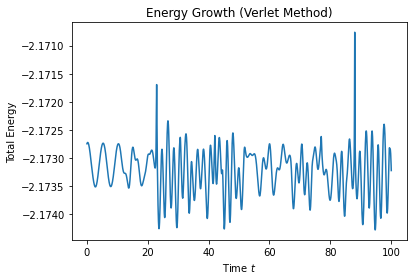

In [45]:
plt.plot(t_traj, e3_traj, label = 'Verlet',color = "tab:blue")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Verlet Method)')
plt.savefig('EG-5a.png')
plt.show()

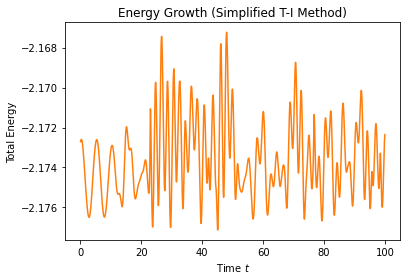

In [46]:
plt.plot(t_traj, e4_traj, label = 'S-T-I', color = "tab:orange")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Simplified T-I Method)')
plt.savefig('EG-5b.png')
plt.show()

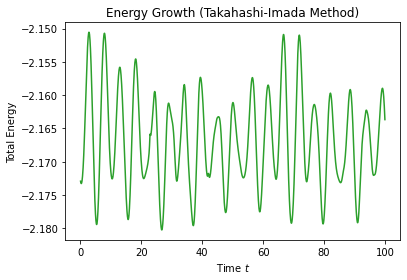

In [47]:
plt.plot(t_traj, e5_traj, label = 'T-I', color = "tab:green")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Takahashi-Imada Method)')
plt.savefig('EG-5c.png')
plt.show()

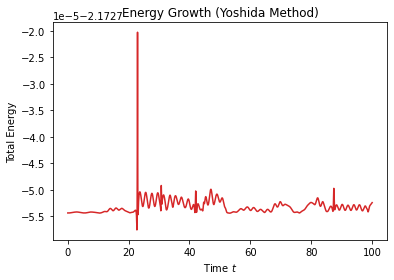

In [48]:
plt.plot(t_traj, e6_traj, label = 'Yoshida',color = "tab:red")
plt.xlabel('Time $t$')
plt.ylabel('Total Energy')
plt.title('Energy Growth (Yoshida Method)')
plt.savefig('EG-5d.png')
plt.show()

Change the initial position to be $q(0) = [r_1,1,r_2,0]$ and $p(0) = [0,-1,0,-1]$, so that $H(q(0),p(0))=0.5$. For `h=0.005`, demonstrate graphically how the maximum energy difference changes in experiments with parameters** 

In [49]:
def Get_Energy_dou(q,p,k1=1.0,r1=1.0,k2=1.0,r2=1.0): 
    
    g = 1.0  
    
    # Your code here
    p1 = np.array([p[0],p[1]])                    
    p2 = np.array([p[2],p[3]])
    q1 = np.array([q[0],q[1]])
    q2 = np.array([q[2],q[3]])
    ke_1 = np.linalg.norm(p1)**2 / 2    # the norm of p1
    ke_2 = np.linalg.norm(p2)**2 / 2    # the norm of p2
    
    q1_y = q[1]
    q2_y = q[3]
    
    V1_spring = k1*(np.linalg.norm(0 - q1) - r1)**2 /2
    V2_spring = k2*(np.linalg.norm(q1 - q2) - r2)**2 /2
    V1_gravity = g*q1_y
    V2_gravity = g*q2_y
    
    H = ke_1 + ke_2 + V1_spring + V2_spring + V1_gravity +V2_gravity
    
    return H 

In [50]:
def ode_rhs_dou(q,p,k1=1.0,r1=1.0,k2=1.0,r2=1.0):
    
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    g = 1.0  
    
    # Your code here 
    p1 = np.array([p[0],p[1]])                    
    p2 = np.array([p[2],p[3]])
    q1 = np.array([q[0],q[1]])
    q2 = np.array([q[2],q[3]])
    
    dq_dt[0] = p1[0] 
    dq_dt[1] = p1[1] 
    dq_dt[2] = p2[0]
    dq_dt[3] = p2[1]
    
    x1 = q1[0]
    y1 = q1[1]
    x2 = q2[0]
    y2 = q2[1]
    r_q1 = np.linalg.norm(q1)
    r_q2 = np.linalg.norm(q2)
    
    r_q12 = np.linalg.norm(q1 - q2)
    
    dp_dt[0] = -k1 *(1 - r1/r_q12)* (x1 -x2) + k1 * (1 - r1/r_q1)* (0 - x1)   
    dp_dt[1] = -k1 *(1 - r1/r_q12)* (y1 -y2) + k1 * (1 - r1/r_q1)* (0 - y1) - g          
    dp_dt[2] = -k2 *(1 - r2/r_q12)* (x2 -x1)
    dp_dt[3] = -k2 *(1 - r2/r_q12)* (y2 -y1) - g
    
    return dq_dt, dp_dt 

In [51]:
def Verlet_dou(q,p,t,h,r1=1.0,k1=1.0,r2=1.0,k2=1.0):
    
     # Compute the force
    dq_dt1, dp_dt1 = ode_rhs_dou(q,p,k1,r1,k2,r2)
    
    # Do the update 
    pt_1 = p + h/2 * dp_dt1
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt, dp_dt = ode_rhs_dou(qt, pt_1,k1,r1,k2,r2)
    pt = pt_1 + h/2 * dp_dt
    tt = t + h

    
    return qt, pt, tt 

In [52]:
def RunVerlet_dou(myk1,myr1,myk2,myr2,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr1,1,myr2,0] )
    p = np.array( [0,-1,0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = Verlet_dou(q,p,t,h,myk1,myr1,myk2,myr2)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_dou(q,p,myk1,myr1,myk2,myr2)]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

In [53]:
# Simplified Takahashi-Imada
def S_T_I_dou(q,p,t,h,r1=1.0,k1=1.0,r2=1.0,k2=1.0):
    
     # Compute the force
    alpha = 1/12
    dq_dt1, dp_dt1 = ode_rhs_dou(q,p,r1,k1,r2,k2)
    dq_dt2, dp_dt2 = ode_rhs_dou(q+alpha*h**2*dp_dt1, p,r1,k1,r2,k2)
    
    # Do the update 
    pt_1 = p + h/2 * dp_dt2
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt3, dp_dt3 = ode_rhs_dou(qt,pt_1,r1,k1,r2,k2)
    dq_dt4, dp_dt4 = ode_rhs_dou(qt + alpha*h**2*dp_dt3,pt_1,r1,k1,r2,k2)
    pt = pt_1 + h/2 * dp_dt4
    tt = t + h
    
    # Return values 
    
    return qt, pt, tt 

In [54]:
def RunSTI_dou(myk1,myr1,myk2,myr2,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr1,1,myr2,0] )
    p = np.array( [0,-1,0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = S_T_I_dou(q,p,t,h,myk1,myr1,myk2,myr2)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_dou(q,p,myk1,myr1,myk2,myr2)]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

In [55]:
def ode_rhs_second_dou2(q,p,r1=1.0,k1=1.0,r2=1.0,k2=1.0):
    
    # Initialize the output 
    dq_dt = np.zeros( q.shape )
    dp_dt = np.zeros( p.shape )
    
    # Set the constants 
    g = 1.0 
    
    # dq/dt = p, according to Hamilton's eqns
    
    x1 = q[0]
    y1 = q[1]
    x2 = q[2]
    y2 = q[3]
    r = np.linalg.norm( q )
    
    #H11 = -k*(r-r0)/r-k*x**2/(r**2)
    #H12 = -k*x*y/r**2
    #H22 = -k*(r-r0)/r-k*y**2/(r**2)
    H = np.zeros([4,4])
    H[0,0]=k1 * x1**2 / (r**2) + k1 * (r-r1) * x1**2 / (r**3) + k1 * (r-r1) / r
    H[0,1]= k1 * x1 * y1 / (r**2) - k1 * x1 * y1 * (r-r2) / (r**3)
    H[0,2]= k1 * x1**2 / (r**2) + k2 * (r-r1) * x2**2 / (r**3) + k2 * (r-r1) / r
    H[0,3]= k1 * x1 * y2 / (r**2) - k2 * x1 * y2 * (r-r2) / (r**3)
    H[1,0]= H[0,1]
    H[1,1]= k1 * y1**2 / (r**2) + k1 * (r-r1) * y1**2 / (r**3) + k1 * (r-r1) / r
    H[1,2]= k1 * x2 * y1 / (r**2) - k2 * x2 * y1 * (r-r2) / (r**3)
    H[1,3]= k1 * y1**2 / (r**2) + k2 * (r-r1) * y2**2 / (r**3) + k2 * (r-r2) / r
    H[2,0]= H[0,2]
    H[2,1]= H[1,2]
    H[2,2]= k1 * x2**2 / (r**2) + k1 * (r-r1) * x2**2 / (r**3) + k1 * (r-r2) / r
    H[2,3]= k1 * x2 * y2 / (r**2) - k1 * x2 * y2 * (r-r1) / (r**3)
    H[3,0]= H[0,3]
    H[3,1]= H[1,3]
    H[3,2]= H[2,3]
    H[3,3]= k2 * y2**2 / (r**2) + k2 * (r-r2) * y2**2 / (r**3) + k2 * (r-r2) / r
    
    return H


In [56]:
# Takahashi-Imada
def T_I_dou2(q,p,t,h,r1=1.0,k1=1.0,r2=1.0,k2=1.0):
    
     # Compute the force
    alpha = 1
    dq_dt1, dp_dt1 = ode_rhs_dou(q,p,r1,k1,r2,k2)
    H1 = ode_rhs_second_dou2(q, p,r1,k1,r2,k2)
    
    # Do the update 
    pt_1 = p + h/2 * (dp_dt1+alpha*h**2*np.dot(H1,dp_dt1))
    qt = q + h * pt_1
    
    # Compute the new energies
    dq_dt3, dp_dt3 = ode_rhs_dou(qt,p,r1,k1,r2,k2)
    H2 = ode_rhs_second_dou2(qt, p,r1,k1,r2,k2)
    # dq_dt4, dp_dt4 = ode_rhs(qt + alpha*h**2*dp_dt3,pt_1)
    pt = pt_1 + h/2 * (dp_dt3+alpha*h**2*np.dot(H2,dp_dt3))
    tt = t + h
    
    return qt, pt, tt 

In [57]:
def RunTI_dou(myk1,myr1,myk2,myr2,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr1,1,myr2,0] )
    p = np.array( [0,-1,0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = T_I_dou2(q,p,t,h,myk1,myr1,myk2,myr2)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_dou(q,p,myk1,myr1,myk2,myr2)]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

In [58]:
def yoshida_dou(q,p,t,h,r1=1.0,k1=1.0,r2=1.0,k2=1.0):
    tau0 = 1.3512
    tau1 = -1.7024
    qt_1, pt_1, t1 = Verlet_dou(q, p, t, h*tau0,r1,k1,r2,k2)
    qt_2, pt_2, t2 = Verlet_dou(qt_1, pt_1, t, h*tau1,r1,k1,r2,k2)
    qt_3, pt_3, t2 = Verlet_dou(qt_2, pt_2, t, h*tau0,r1,k1,r2,k2)
    tt = t + h
    return qt_3, pt_3, tt

In [59]:
def RunYoshida_dou(myk1,myr1,myk2,myr2,h,T):
    
    # Set end time T and stepsize h   
    Nsteps = int(T / h)

    # Make a copy of our initial values so we
    # don't accidently overwrite them 
    q = np.array( [myr1,1,myr2,0] )
    p = np.array( [0,-1,0,-1]) 
    t=0
    
    # Initialize our saved trajectory to be blank 
    q_traj = [] 
    p_traj = [] 
    t_traj = [] 
    e_traj = [] 

    # Run the loop 
    for n in range(Nsteps):
        q,p,t = yoshida_dou(q,p,t,h,myk1,myr1,myk2,myr2)  # Update step

        q_traj = q_traj + [q] 
        p_traj = p_traj + [p]
        t_traj = t_traj + [t] 
        e_traj = e_traj + [ Get_Energy_dou(q,p,myk1,myr1,myk2,myr2)]

    return np.max( np.abs( e_traj[0] - e_traj ))
    

In [60]:
H = np.logspace(-2.5,-1.5,10)
T = 10 
res3_h = []
res4_h = []
res5_h = []
res6_h = []

for hh in H:
    res3_h += [RunVerlet_dou( 1.0 , 1.0 , 1.0, 1.0, hh , T )]
    res4_h += [RunSTI_dou( 1.0 , 1.0 , 1.0, 1.0, hh , T )]
    res5_h += [RunTI_dou( 1.0 , 1.0 , 1.0, 1.0, hh , T )]
    res6_h += [RunYoshida_dou( 1.0 , 1.0 , 1.0, 1.0, hh , T )]

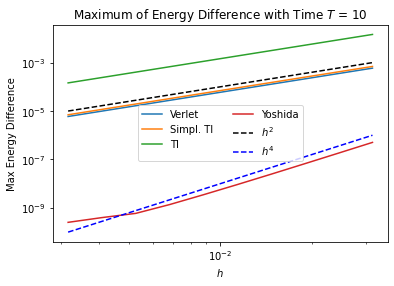

In [61]:
plt.loglog( H , res3_h ,label='Verlet', color = 'tab:blue')
plt.loglog( H , res4_h ,label='Simpl. TI', color = 'tab:orange' )
plt.loglog( H , res5_h ,label='TI', color = 'tab:green')
plt.loglog( H , res6_h ,label='Yoshida', color = 'tab:red')
plt.loglog( H , H**2, '--k' ,label='$h^2$')
plt.loglog( H , H**4, '--b' ,label='$h^4$')

plt.xlabel('$h$')
plt.ylabel('Max Energy Difference')
plt.title('Maximum of Energy Difference with Time $T$ = 10')
plt.legend(ncol = 2)
plt.savefig('double_all.png')
plt.show()

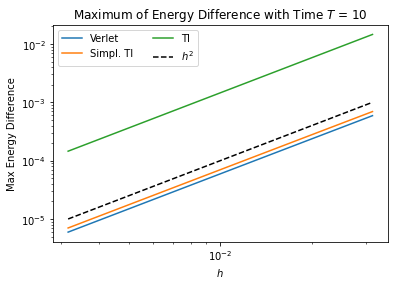

In [62]:
plt.loglog( H , res3_h ,label='Verlet', color = 'tab:blue')
plt.loglog( H , res4_h ,label='Simpl. TI', color = 'tab:orange' )
plt.loglog( H , res5_h ,label='TI', color = 'tab:green')
plt.loglog( H , H**2, '--k' ,label='$h^2$')

plt.xlabel('$h$')
plt.ylabel('Max Energy Difference')
plt.title('Maximum of Energy Difference with Time $T$ = 10')
plt.legend(ncol = 2)
plt.savefig('double_order2.png')
plt.show()